In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline


# Caracterización de Sistemas de tiempo discreto LTI en el Dominio del Tiempo


## Ecuaciones en diferencia

La relación entre la señal de entrada $x[k]$ y la señal de salida $y[k] = \mathcal{H} \{ x[k] \}$ en los sistemas de tiempo discreto se describe a partir de los valores actuales y pasados de dichas señales. En [sistemas LTI de tiempo discreto](https://en.wikipedia.org/wiki/LTI_system_theory), estas relaciones corresponden a [ecuaciones en diferencias lineales](https://en.wikipedia.org/wiki/Linear_difference_equation).


En términos generales, la relación entre $x[k] \in \mathbb{C}$ y $y[k] \in \mathbb{C}$ con $k \in \mathbb{Z}$ de un sistema es:

\begin{equation}
\sum_{n = 0}^{N} a_n \; y[k - n] = \sum_{m = 0}^{M} b_m \; x[k -m]
\end{equation}

donde $a_n$ ($a_N \neq 0$) y $b_n$ son los coeficientes que determinan el comportamiento del sistema. El orden de la ecuació es dado por $N$.Observe que para dar una solución a la ecuación se requiere de $N$ condiciones iniciales. En muchos casos es correcto suponer que $x[k] = 0$ para $k < 0$ junto a $y[0], y[-1], \dots, y[-N + 1]$.


La solución de la ecuación en diferencias anterior se obtiene a partir de:
$$a_{0}y[k]+a_{1}y[k-1]+\cdots+ a_Ny[k-N]= b_{0}x[k]+b_{1}x[k-1]+\cdots + b_Mx[k-M]$$
$$y[k]=  \frac{1}{a_{0}}\left( \left( b_{0}x[k]+b_{1}x[k-1]+\cdots + b_Mx[k-M]\right)- \left(  a_{1}y[k-1]+\cdots+ a_Ny[k-N]\right)\right)$$

Que puede expresarse como

\begin{equation}
y[k] = \frac{1}{a_0} \left( \underbrace{\sum_{m=0}^{M} b_m \; x[k-m]}_{\text{parte no recursiva}}  - \overbrace{\sum_{n=1}^{N} a_n \; y[k-n]}^{\text{parte recursiva}} \right)
\end{equation}

con $a_0 \neq 0$.

Un sistema LTI discreto queda entonces completamente caracterizado con sus coeficientes y las condiciones iniciales.


Así, la señal de salida se puede hallar como una combinación lineal de valores presentes y pasados de la entrada y valores pasados de la señal de salida. La parte recursiva puede interpretarse como la propagación de la historia de la salida sobre sí misma.

- Un sistema es no recursivo si su salida $y[k]$ depende solamente de la entrada $x[k]$, es decir, $a_n = 0$ for $n > 0$.
- Un sistema es recursivo si su salida $y[k]$ depende de la entrada $x[k]$ y valores pasados de la salida, es decir, existe algún $a_n \neq 0$ para $n > 0$.

### Retraso
 
Considere un sistema $\mathcal{H}$ que retrasa la señal de entrada $\kappa \in \mathbb{N}$ muestras. 

$$y[k] = \mathcal{H} \{ x[k] \}$$
\begin{equation}
y[k] = x[k - \kappa]
\end{equation}

De acuerdo con la forma general

\begin{equation}
y[k] = \frac{1}{a_0} \left( \underbrace{\sum_{m=0}^{M} b_m \; x[k-m]}_{\text{parte no recursiva}}  - \overbrace{\sum_{n=1}^{N} a_n \; y[k-n]}^{\text{parte recursiva}} \right)
\end{equation}

El orden del sistema es $N=0$, es no recursivo y los coeficientes de la ecuación en diferenciasa son:
\begin{align}
a_0 &= 1 \\
b_m &= \begin{cases}
1 & \text{para } m=\kappa \\
0 & \text{en otro caso}
\end{cases}
\end{align}



Revise la documentación del módulo [`scipy.signal`](http://docs.scipy.org/doc/scipy/reference/signal.html).

Usando la función [`scipy.signal.filter`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html#scipy.signal.lfilter) puede implementarsr la ecuación anterior.

Puede computar la salida $y[k]$ ante una señal de entrada impulso considerando condiciones iniciales iguales a cero y un valor $\kappa = 4$.


C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


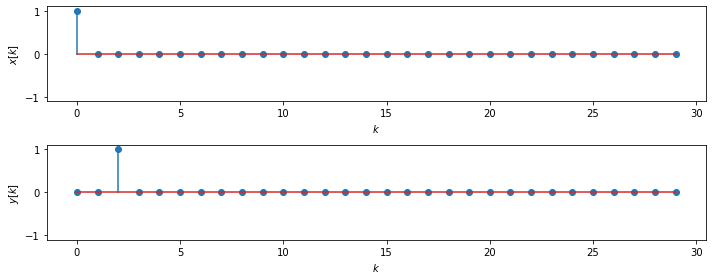

In [2]:

a = 1.0# Coeficientes a_n

b = [0.0,0.0, 1.0 , 0.0, 0.0, 0.0, 0.0, 0.0 ]# Coeficientes b_n

k = np.arange(30)# Vector de instantes para simular

x = np.where((k == 0), 1.0, 0.0)
# Señal de entrada
y = signal.lfilter(b, a, x)# Señal de salida

plt.figure(figsize=(10, 4))
plt.subplot(211)
plt.stem(k, x)
plt.xlabel('$k$')
plt.ylabel(r'$x[k]$')
plt.ylim([-1.1, 1.1])

plt.subplot(212)
plt.stem(k, y)
plt.xlabel('$k$')
plt.ylabel('$y[k]$')
plt.ylim([-1.1, 1.1])
plt.tight_layout()

Puede computar la salida $y[k]$ ante una señal de entrada $x[k] = \cos[\Omega k]$ considerando condiciones iniciales iguales a cero y un valor $\kappa = 4$.

C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


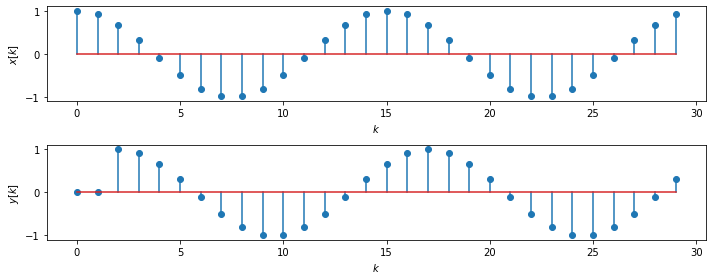

In [3]:
x = np.cos(2*np.pi/15 * k) # Señal de entrada
y = signal.lfilter(b, a, x)# Señal de salida

plt.figure(figsize=(10, 4))
plt.subplot(211)
plt.stem(k, x)
plt.xlabel('$k$')
plt.ylabel(r'$x[k]$')
plt.ylim([-1.1, 1.1])

plt.subplot(212)
plt.stem(k, y)
plt.xlabel('$k$')
plt.ylabel('$y[k]$')
plt.ylim([-1.1, 1.1])
plt.tight_layout()

Varíe los valores de $\kappa$.

¿Podría hacer que $\kappa = -3$?


### Media móvil

El filtro de [media móvil](https://en.wikipedia.org/wiki/Moving_average) se usa para suavizar la variaciones cortas en señal de entrada dejando las tendencias.

\begin{equation}
y[k] = \frac{1}{M} \sum_{\kappa = 0}^{M-1} x[k - \kappa]
\end{equation}

Este sistema es no recursivo, de orden $N=0$ y sus coeficientes son:

\begin{align}
a_0 &= 1 \\
b_m &= \begin{cases}
\frac{1}{M} & \text{for } 0 \leq m < M \\
0 & \text{otherwise}
\end{cases}
\end{align}


Respuesta impulsional

C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


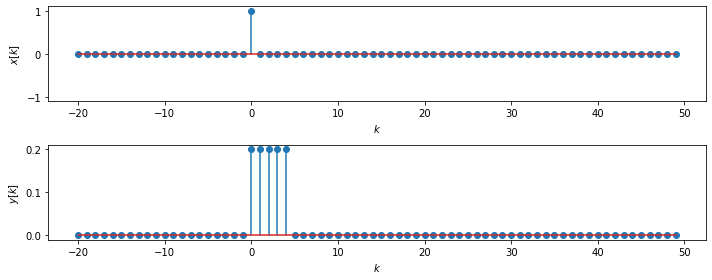

In [4]:
M = 5
a = [1.0]# Coeficientes a_n
b = 1/M * np.ones(M)# Coeficientes b_n

k = np.arange(-20, 50)# Vector de instantes para simular

x = np.where((k == 0), 1.0, 0.0)
# Señal de entrada
y = signal.lfilter(b, a, x)# Señal de salida

plt.figure(figsize=(10, 4))
plt.subplot(211)
plt.stem(k, x)
plt.xlabel('$k$')
plt.ylabel(r'$x[k]$')
plt.ylim([-1.1, 1.1])

plt.subplot(212)
plt.stem(k, y)
plt.xlabel('$k$')
plt.ylabel('$y[k]$')
plt.tight_layout()

C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of

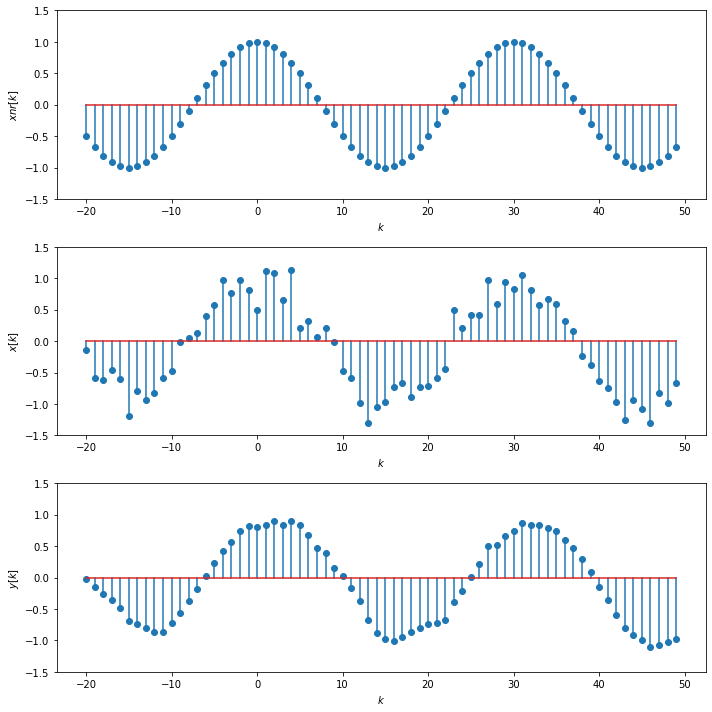

In [5]:
np.random.seed(seed=0)

xnr = np.cos(2*np.pi/30 * k) # Señal x sin ruido
x = xnr  + 0.2 * np.random.normal(size=(len(k)))# Señal x con ruido
y = signal.lfilter(b, a, x)# Señal de salida

plt.figure(figsize=(10, 10))

plt.subplot(311)
plt.stem(k,xnr)
plt.xlabel('$k$')
plt.ylabel(r'$xnr[k]$')
plt.ylim([-1.5, 1.5])


plt.subplot(312)
plt.stem(k, x)
plt.xlabel('$k$')
plt.ylabel(r'$x[k]$')
plt.ylim([-1.5, 1.5])

plt.subplot(313)
plt.stem(k, y)
plt.xlabel('$k$')
plt.ylabel('$y[k]$')
plt.ylim([-1.5, 1.5])
plt.tight_layout()

- Qué efecto tiene el largo del filtro `M` sobre la salida del sistema?

### Filtro de orden 2

Considere el sistema modelado por:

\begin{equation}
y[k] - y[k-1] + \frac{1}{2} y[k-2] = x[k]
\end{equation}

Este sistema es de orden $N=2$ y sus coeficientes son:


\begin{align}
a_0 &= 1 \\
a_{1} &= -1 \\
a_{2} &= \frac{1}{2} \\
b_0 &= 1
\end{align}

La ecuación que se implementa en un microcontrolador es:

\begin{equation}
y[k] =  x[k] + y[k-1] - \frac{1}{2} y[k-2]
\end{equation}


| k| -1 | 0 | 1 | 2 | 3 | 4 | 5 |
|--|----|---|---|---|---|---|---|
|x | 0  | 1 | 0 | 0 | 0 | 0 | 0 |
|y | 0  | 1 | 1 |0.5| 0 |-.25|  -0.25 |
|y1| 0  | 0 | 1 |   |   |   |   |
|y2| 0  | 0 | 0 |   |   |   |   |



Respuesta impulsional

C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


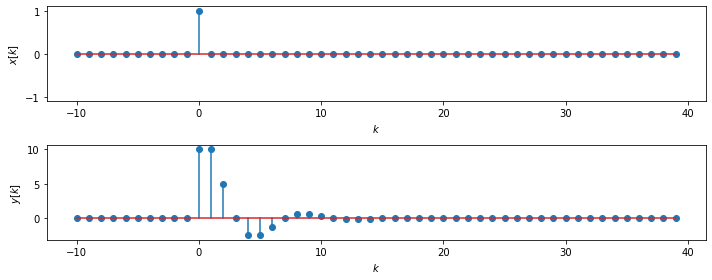

In [6]:

a = [1.0, -1.0, 1/2]
b = [10]

k = np.arange(-10, 40)

x = np.where((k == 0), 1.0, 0.0)
# Señal de entrada
y = signal.lfilter(b, a, x)# Señal de salida

plt.figure(figsize=(10, 4))
plt.subplot(211)
plt.stem(k, x)
plt.xlabel('$k$')
plt.ylabel(r'$x[k]$')
plt.ylim([-1.1, 1.1])

plt.subplot(212)
plt.stem(k, y)
plt.xlabel('$k$')
plt.ylabel('$y[k]$')
#plt.ylim([-0.01, 0.01])
plt.tight_layout()

C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


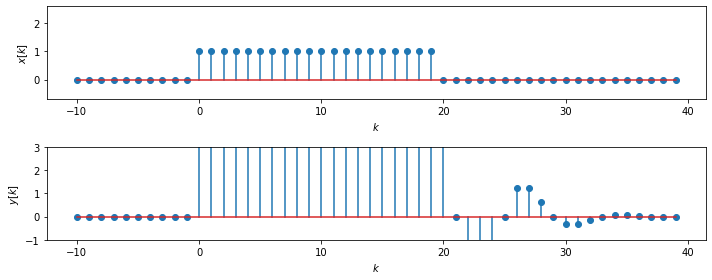

In [7]:
def rect(k, N):
    return np.where((k >= 0) & (k < N), 1.0, 0.0)

x = rect(k, 20)
y = signal.lfilter(b, a, x)

plt.figure(figsize=(10, 4))
plt.subplot(211)
plt.stem(k, x)
plt.xlabel('$k$')
plt.ylabel(r'$x[k]$')
plt.ylim([-0.7, 2.6])

plt.subplot(212)
plt.stem(k, y)
plt.xlabel('$k$')
plt.ylabel('$y[k]$')
plt.ylim([-1, 3])
plt.tight_layout()

C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of

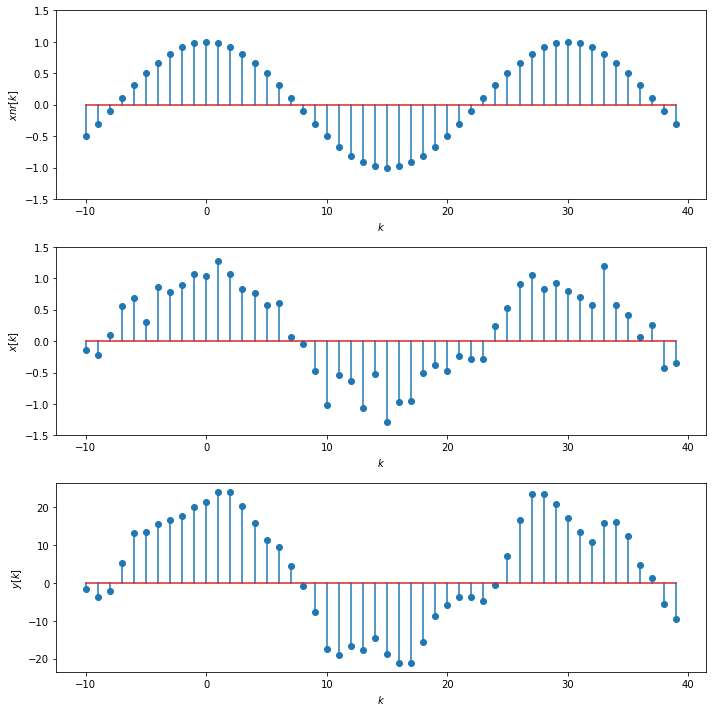

In [8]:
np.random.seed(seed=0)

xnr = np.cos(2*np.pi/30 * k) # Señal x sin ruido
x = xnr  + 0.2 * np.random.normal(size=(len(k)))# Señal x con ruido
y = signal.lfilter(b, a, x)# Señal de salida

plt.figure(figsize=(10, 10))

plt.subplot(311)
plt.stem(k,xnr)
plt.xlabel('$k$')
plt.ylabel(r'$xnr[k]$')
plt.ylim([-1.5, 1.5])


plt.subplot(312)
plt.stem(k, x)
plt.xlabel('$k$')
plt.ylabel(r'$x[k]$')
plt.ylim([-1.5, 1.5])

plt.subplot(313)
plt.stem(k, y)
plt.xlabel('$k$')
plt.ylabel('$y[k]$')
#plt.ylim([-1.5, 1.5])
plt.tight_layout()

- ¿Cuántos instantes dura la respuesta impulsional de los sistemas no recursivos?

- ¿Cuántos instantes dura la respuesta impulsional de los sistemas recursivos?

## Convolución

Observe que una señal de tiempo discreto puede representarse como una combinación de impulsos desplazados en el tiempo

\begin{equation}
x[k] = \sum_{\kappa = -\infty}^{\infty} x[\kappa] \cdot \delta[k-\kappa]
\end{equation}

C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()
C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as

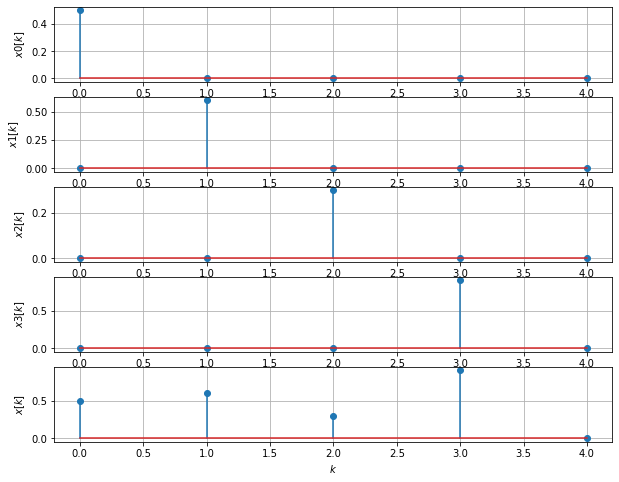

In [9]:
x  = [0.5, 0.6, 0.3, 0.9 ,0.0]
x0 = [0.5, 0.0, 0.0, 0.0, 0.0]
x1 = [0.0, 0.6, 0.0, 0.0, 0.0]
x2 = [0.0, 0.0, 0.3, 0.0, 0.0]
x3 = [0.0, 0.0, 0.0, 0.9, 0.0]

k = [0, 1, 2, 3, 4]
plt.figure(figsize=(10, 8))
plt.subplot(511)
plt.stem(k, x0)
plt.xlabel('$k$')
plt.ylabel(r'$x0[k]$')
plt.grid()

plt.subplot(512)
plt.stem(k, x1)
plt.xlabel('$k$')
plt.ylabel(r'$x1[k]$')
plt.grid()

plt.subplot(513)
plt.stem(k, x2)
plt.xlabel('$k$')
plt.ylabel(r'$x2[k]$')
plt.grid()

plt.subplot(514)
plt.stem(k, x3)
plt.xlabel('$k$')
plt.ylabel(r'$x3[k]$')
plt.grid()

plt.subplot(515)
plt.stem(k, x)
plt.xlabel('$k$')
plt.ylabel(r'$x[k]$')
plt.grid()


La salida de un sistema es:

\begin{equation}
y[k] = \mathcal{H} \left\{ \sum_{\kappa = -\infty}^{\infty} x[\kappa] \cdot \delta[k-\kappa] \right\}
\end{equation}

Considerando que el sistema es LTI, se puede reescribir la expresión como:
\begin{equation}
y[k] = \sum_{\kappa = -\infty}^{\infty} x[\kappa] \cdot \mathcal{H} \left\{ \delta[k-\kappa] \right\}
\end{equation}

La [ respuesta impulsional ](https://en.wikipedia.org/wiki/Impulse_response) es:

\begin{equation}
h[k] = \mathcal{H} \left\{ \delta[k] \right\}
\end{equation}

Y se obtiene finalmente:

\begin{align}
y[k] &= \sum_{\kappa = -\infty}^{\infty} x[\kappa] \cdot h[k-\kappa]\\
y[k] &= x[k] * h[k]
\end{align}

Este último es el operador [*convolución*](https://en.wikipedia.org/wiki/Convolution) y permite encontrar la respuesta de un sistema L TI ante cualquier entrada a partir de conocer su respuesta impulsional.

Suponga que conoce los valores de la respuesta impulsional de un sistema  los tabula según el instante $k$.

|$k$| $-1$ | $0$ | $1$ | $2$ | $\cdots$ | $k-1$ | $k$ | $k+1$ |
|---|------|-----|-----|-----|----------|-------|-----|-------|
|$\delta[k]$| $0$ | $1$ | $0$ | $0$ | $\cdots$ | $0$ | $0$ | $0$ |
|$h[k]$| $h[-1]$ | $h[0]$ | $h[1]$ | $h[2]$ | $\cdots$ | $h[k-1]$ | $h[k]$ | $h[k+1]$ |

Una señal de entrada $x[k]$ puede descomponerse en impulsos independientes $x_i[k]$.




|$k$| $-1$ | $0$ | $1$ | $2$ | $\cdots$ | $k-1$ | $k$ | $k+1$ |
|---|------|-----|-----|-----|----------|-------|-----|-------|
|$x[k]$| $x[-1]$ | $x[0]$ | $x[1]$ | $x[2]$ | $\cdots$ | $x[k-1]$ | $x[k]$ | $x[k+1]$ |
|$x_{-1}[k]$|$x[-1]$ | $0$ | $0$ | $0$ | $\cdots$ | $0$ | $0$ | $0$ |
|$x_{0}[k]$| $0$ | $x[0]$ | $0$ | $0$ | $\cdots$ | $0$ | $0$ | $0$ |
|$x_{1}[k]$| $0$ | $0$ | $x[1]$ | $0$ | $\cdots$ | $0$ | $0$ | $0$ |
|$x_{2}[k]$| $0$ | $0$ | $0$ | $x[2]$ | $\cdots$ | $0$ | $0$ | $0$ |
|$\cdots$  | $\cdots$ | $\cdots$ | $\cdots$ | $\cdots$ | $\cdots$ | $\cdots$ | $\cdots$ | $\cdots$ |
|$x_{k-1}[k]$| $0$ | $0$ | $0$ | $0$ | $\cdots$ | $x[k-1]$ | $0$ | $0$ |
|$x_{k}[k]$| $0$ | $0$ | $0$ | $0$ | $\cdots$ | $0$ | $x[k]$ | $0$ |
|$x_{k+1}[k]$| $0$ | $0$ | $0$ | $0$ | $\cdots$ | $0$ | $0$ | $x[k+1]$ |

La respuesta impulsional $h[k]$ permite obtener la respuesta $y_i[k]$ ante cada impulso identificado.





|$k$| $-1$ | $0$ | $1$ | $2$ | $\cdots$ | $k-1$ | $k$ | $k+1$ |
|---|------|-----|-----|-----|----------|-------|-----|-------|
|$x_{-1}[k]$|$x[-1]$ | $0$ | $0$ | $0$ | $\cdots$ | $0$ | $0$ | $0$ |
|$y_{-1}[k]$| $x[-1]h[0]$ | $x[-1]h[1]$ | $x[-1]h[2]$ | $x[-1]h[3]$ | $\cdots$ | $x[-1]h[k]$ | $x[-1]h[k+1]$ | $x[-1]h[k+2]$ |

|$k$| $-1$ | $0$ | $1$ | $2$ | $\cdots$ | $k-1$ | $k$ | $k+1$ |
|---|------|-----|-----|-----|----------|-------|-----|-------|
|$x_{0}[k]$| $0$ | $x[0]$ | $0$ | $0$ | $\cdots$ | $0$ | $0$ | $0$ |
|$y_{0}[k]$| $x[0]h[-1]$ | $x[0]h[0]$ | $x[0]h[1]$ | $x[0]h[2]$ | $\cdots$ | $x[0]h[k-1]$ | $x[0]h[k]$ | $x[0]h[k+1]$ |

|$k$| $-1$ | $0$ | $1$ | $2$ | $\cdots$ | $k-1$ | $k$ | $k+1$ |
|---|------|-----|-----|-----|----------|-------|-----|-------|
|$x_{1}[k]$| $0$ | $0$ | $x[1]$ | $0$ | $\cdots$ | $0$ | $0$ | $0$ |
|$y_{1}[k]$| $x[1]h[-2]$ | $x[1]h[-1]$ | $x[1]h[0]$ | $x[1]h[1]$ | $\cdots$ | $x[1]h[k-2]$ | $x[1]h[k-1]$ | $x[1]h[k]$ |

|$k$| $-1$ | $0$ | $1$ | $2$ | $\cdots$ | $k-1$ | $k$ | $k+1$ |
|---|------|-----|-----|-----|----------|-------|-----|-------|
|$x_{2}[k]$| $0$ | $0$ | $0$ | $x[2]$ | $\cdots$ | $0$ | $0$ | $0$ |
|$y_{2}[k]$| $x[2]h[-3]$ | $x[2]h[-2]$ | $x[2]h[-1]$ | $x[2]h[0]$ | $\cdots$ | $x[2]h[k-3]$ | $x[2]h[k-2]$ | $x[2]h[k-1]$ |

|$k$| $-1$ | $0$ | $1$ | $2$ | $\cdots$ | $k-1$ | $k$ | $k+1$ |
|---|------|-----|-----|-----|----------|-------|-----|-------|
|$x_{k-1}[k]$| $0$ | $0$ | $0$ | $0$ | $\cdots$ | $x[k-1]$ | $0$ | $0$ |
|$y_{k-1}[k]$| $x[k-1]h[-k]$ | $x[k-1]h[-k+1]$ | $x[k-1]h[-k+2]$ | $x[k-1]h[-k+3]$ | $\cdots$ | $x[k-1]h[0]$ | $x[k-1]h[1]$ | $x[k-1]h[2]$ |

|$k$| $-1$ | $0$ | $1$ | $2$ | $\cdots$ | $k-1$ | $k$ | $k+1$ |
|---|------|-----|-----|-----|----------|-------|-----|-------|
|$x_{k}[k]$| $0$ | $0$ | $0$ | $0$ | $\cdots$ | $0$ | $x[k]$ | $0$ |
|$y_{k}[k]$| $x[k]h[-k-1]$ | $x[k]h[-k]$ | $x[k]h[-k+1]$ | $x[k]h[-k+2]$ | $\cdots$ | $x[k]h[-1]$ | $x[k]h[0]$ | $x[k]h[1]$ |

|$k$| $-1$ | $0$ | $1$ | $2$ | $\cdots$ | $k-1$ | $k$ | $k+1$ |
|---|------|-----|-----|-----|----------|-------|-----|-------|
|$x_{k+1}[k]$| $0$ | $0$ | $0$ | $0$ | $\cdots$ | $0$ | $0$ | $x[k+1]$ |
|$y_{k+1}[k]$| $x[k+1]h[-k-2]$ | $x[k+1]h[-k-1]$ | $x[k+1]h[-k]$ | $x[k+1]h[-k+1]$ | $\cdots$ | $x[k+1]h[-2]$ | $x[k+1]h[-1]$ | $x[k+1]h[0]$ |


Las salidas independientes permiten encontrar $y[k]$



|$k$| $-1$ | $0$ | $1$ | $2$ | $\cdots$ | $k-1$ | $k$ | $k+1$ |
|---|------|-----|-----|-----|----------|-------|-----|-------|
|$y_{-1}[k]$| $x[-1]h[0]$ | $x[-1]h[1]$ | $x[-1]h[2]$ | $x[-1]h[3]$ | $\cdots$ | $x[-1]h[k]$ | $x[-1]h[k+1]$ | $x[-1]h[k+2]$ |
|$y_{0}[k]$| $x[0]h[-1]$ | $x[0]h[0]$ | $x[0]h[1]$ | $x[0]h[2]$ | $\cdots$ | $x[0]h[k-1]$ | $x[0]h[k]$ | $x[0]h[k+1]$ |
|$y_{1}[k]$| $x[1]h[-2]$ | $x[1]h[-1]$ | $x[1]h[0]$ | $x[1]h[1]$ | $\cdots$ | $x[1]h[k-2]$ | $x[1]h[k-1]$ | $x[1]h[k]$ |
|$y_{2}[k]$| $x[2]h[-3]$ | $x[2]h[-2]$ | $x[2]h[-1]$ | $x[2]h[0]$ | $\cdots$ | $x[2]h[k-3]$ | $x[2]h[k-2]$ | $x[2]h[k-1]$ |
|$\cdots$  | $\cdots$ | $\cdots$ | $\cdots$ | $\cdots$ | $\cdots$ | $\cdots$ | $\cdots$ | $\cdots$ |
|$y_{k-1}[k]$| $x[k-1]h[-k]$ | $x[k-1]h[-k+1]$ | $x[k-1]h[-k+2]$ | $x[k-1]h[-k+3]$ | $\cdots$ | $x[k-1]h[0]$ | $x[k-1]h[1]$ | $x[k-1]h[2]$ |
|$y_{k}[k]$| $x[k]h[-k-1]$ | $x[k]h[-k]$ | $x[k]h[-k+1]$ | $x[k]h[-k+2]$ | $\cdots$ | $x[k]h[-1]$ | $x[k]h[0]$ | $x[k]h[1]$ |
|$y_{k+1}[k]$| $x[k+1]h[-k-2]$ | $x[k+1]h[-k-1]$ | $x[k+1]h[-k]$ | $x[k+1]h[-k+1]$ | $\cdots$ | $x[k+1]h[-2]$ | $x[k+1]h[-1]$ | $x[k+1]h[0]$ |
|$y[k]$| $y[-1]$ | $y[0]$ | $y[1]$ | $y[2]$ | $\cdots$ | $y[k-1]$ | $y[k]$ | $y[k+1]$ |

Observe que:

\begin{align}
y[k] &= \sum_{\kappa = -\infty}^{\infty} x[\kappa] \cdot h[k-\kappa]\\
y[k] &= x[k] * h[k]
\end{align}

A continuación la tabla con todos los datos

|$k$| $-1$ | $0$ | $1$ | $2$ | $\cdots$ | $k-1$ | $k$ | $k+1$ |
|---|------|-----|-----|-----|----------|-------|-----|-------|
|$x_{-1}[k]$|$x[-1]$ | $0$ | $0$ | $0$ | $\cdots$ | $0$ | $0$ | $0$ |
|$y_{-1}[k]$| $x[-1]h[0]$ | $x[-1]h[1]$ | $x[-1]h[2]$ | $x[-1]h[3]$ | $\cdots$ | $x[-1]h[k]$ | $x[-1]h[k+1]$ | $x[-1]h[k+2]$ |
|$x_{0}[k]$| $0$ | $x[0]$ | $0$ | $0$ | $\cdots$ | $0$ | $0$ | $0$ |
|$y_{0}[k]$| $x[0]h[-1]$ | $x[0]h[0]$ | $x[0]h[1]$ | $x[0]h[2]$ | $\cdots$ | $x[0]h[k-1]$ | $x[0]h[k]$ | $x[0]h[k+1]$ |
|$x_{1}[k]$| $0$ | $0$ | $x[1]$ | $0$ | $\cdots$ | $0$ | $0$ | $0$ |
|$y_{1}[k]$| $x[1]h[-2]$ | $x[1]h[-1]$ | $x[1]h[0]$ | $x[1]h[1]$ | $\cdots$ | $x[1]h[k-2]$ | $x[1]h[k-1]$ | $x[1]h[k]$ |
|$x_{2}[k]$| $0$ | $0$ | $0$ | $x[2]$ | $\cdots$ | $0$ | $0$ | $0$ |
|$y_{2}[k]$| $x[2]h[-3]$ | $x[2]h[-2]$ | $x[2]h[-1]$ | $x[2]h[0]$ | $\cdots$ | $x[2]h[k-3]$ | $x[2]h[k-2]$ | $x[2]h[k-1]$ |
|$\cdots$  | $\cdots$ | $\cdots$ | $\cdots$ | $\cdots$ | $\cdots$ | $\cdots$ | $\cdots$ | $\cdots$ |
|$x_{k-1}[k]$| $0$ | $0$ | $0$ | $0$ | $\cdots$ | $x[k-1]$ | $0$ | $0$ |
|$y_{k-1}[k]$| $x[k-1]h[-k]$ | $x[k-1]h[-k+1]$ | $x[k-1]h[-k+2]$ | $x[k-1]h[-k+3]$ | $\cdots$ | $x[k-1]h[0]$ | $x[k-1]h[1]$ | $x[k-1]h[2]$ |
|$x_{k}[k]$| $0$ | $0$ | $0$ | $0$ | $\cdots$ | $0$ | $x[k]$ | $0$ |
|$y_{k}[k]$| $x[k]h[-k-1]$ | $x[k]h[-k]$ | $x[k]h[-k+1]$ | $x[k]h[-k+2]$ | $\cdots$ | $x[k]h[-1]$ | $x[k]h[0]$ | $x[k]h[1]$ |
|$x_{k+1}[k]$| $0$ | $0$ | $0$ | $0$ | $\cdots$ | $0$ | $0$ | $x[k+1]$ |
|$y_{k+1}[k]$| $x[k+1]h[-k-2]$ | $x[k+1]h[-k-1]$ | $x[k+1]h[-k]$ | $x[k+1]h[-k+1]$ | $\cdots$ | $x[k+1]h[-2]$ | $x[k+1]h[-1]$ | $x[k+1]h[0]$ |
|$x[k]$| $x[-1]$ | $x[0]$ | $x[1]$ | $x[2]$ | $\cdots$ | $x[k-1]$ | $x[k]$ | $x[k+1]$ |
|$y[k]$|$\Sigma y$ |$\Sigma y$  | $\Sigma y$  | $\Sigma y$  | $\cdots$ | $\Sigma y$  | $x*h$  | $\Sigma y$  |




**Ejemplo**

Calcule la $x[k]*h[k]$ con:

\begin{align}
h[k] &= \epsilon[k] \cdot e^{- \frac{k}{2}} \\
x[k] &= \frac{4}{5} \text{rect}_N[k] 
\end{align}

Usando $N=6$.


In [19]:

def heaviside(k):
    return np.where(k >= 0, 1.0, 0.0)


def rect(k, N):
    return np.where((0 <= k) & (k < N), 1.0, 0.0)


def x(k):
    return 4/5 * rect(k, 6)


def h(k):
    return heaviside(k) * np.exp(- k/2)


def plot_signals(k, x, h, xlabel, hlabel, klabel):
    plt.figure(figsize=(12, 4))
    plt.stem(k, x, linefmt='C0-', markerfmt='C0o', label=xlabel)
    plt.stem(k, h, linefmt='C1-', markerfmt='C1o', label=hlabel)
    plt.xlabel(klabel)
    plt.legend()
    plt.ylim([0, 1.2])
    plt.grid(True)

C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


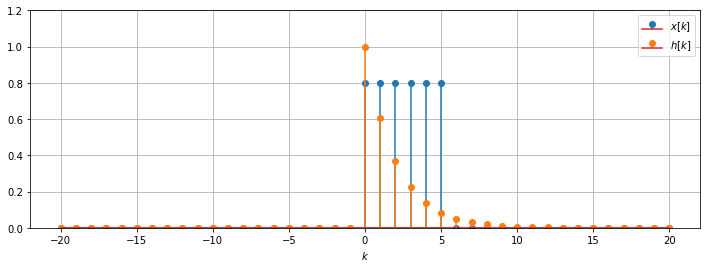

In [20]:
k = np.arange(-20, 21)
plot_signals(k, x(k), h(k), r'$x[k]$', r'$h[k]$', r'$k$')

\begin{align}
y[k] &= \sum_{\kappa = -\infty}^{\infty} x[\kappa] \cdot h[k-\kappa]\\
y[k] &= x[k] * h[k]
\end{align}


Se cambia el dominio $k$ a $\kappa$

C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


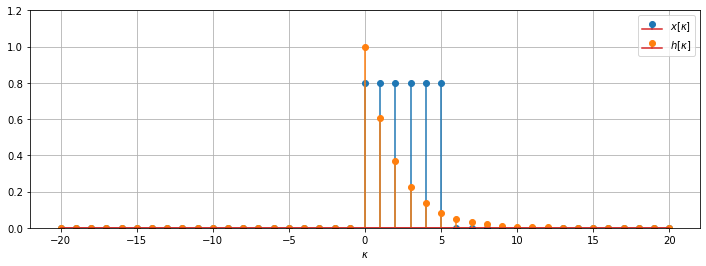

In [21]:
kappa = np.arange(-20, 21)

x1 = x(kappa)
h1 = h(kappa)

plot_signals(kappa, x1, h1, r'$x[\kappa]$', r'$h[\kappa]$', r'$\kappa$')

Se invierte $h[\kappa]$

C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


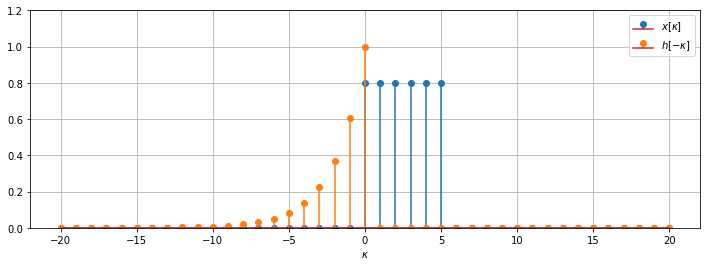

In [22]:
h2 = h(kappa[::-1])  # Python's elegant array reversal

plot_signals(k, x1, h2, r'$x[\kappa]$', r'$h[-\kappa]$', r'$\kappa$')

Se desplaza $h[\kappa]$ para encontrar traslapes y calcular la acumulación del producto con $x[\kappa]$.

C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


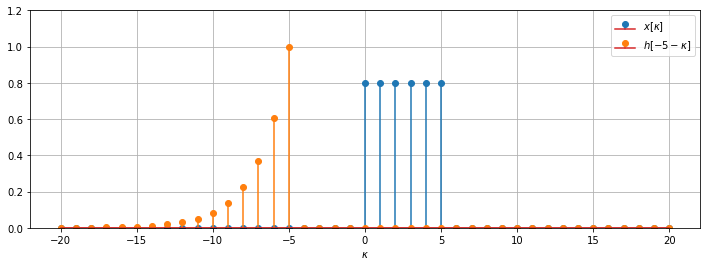

In [23]:
h3 = h(-5 + kappa[::-1])

plot_signals(k, x1, h3, r'$x[\kappa]$', r'$h[-5 -\kappa]$', r'$\kappa$')

C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


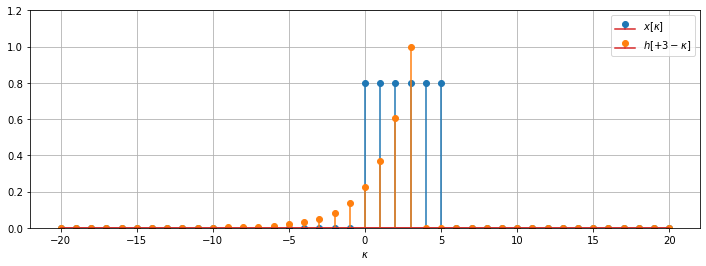

In [15]:
h4 = h(3 + kappa[::-1])

plot_signals(k, x1, h4, r'$x[\kappa]$', r'$h[+3 -\kappa]$', r'$\kappa$')

C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


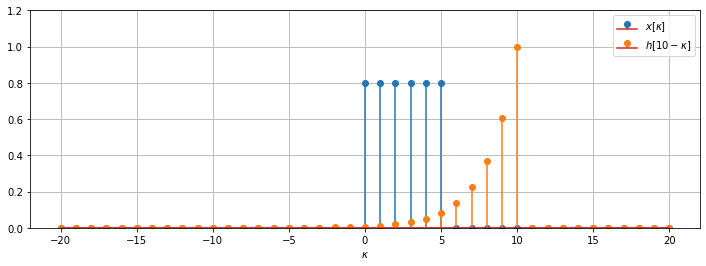

In [16]:
h5 = h(10 + kappa[::-1])

plot_signals(k, x1, h5, r'$x[\kappa]$', r'$h[10 -\kappa]$', r'$\kappa$')

C:\Users\Usuario\.conda\envs\SistDin\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


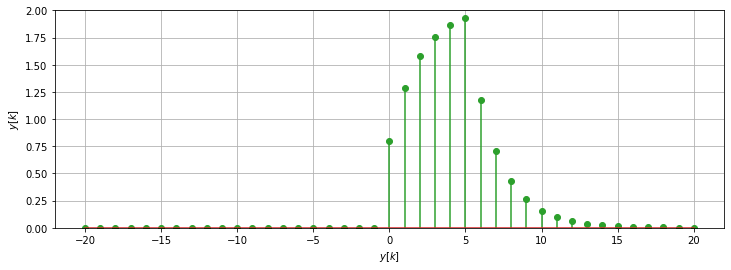

In [24]:
def y(k):
    return np.convolve(x(k), h(k), mode='same')

plt.figure(figsize=(12, 4))
plt.stem(k, y(k), linefmt='C2-', markerfmt='C2o')
plt.xlabel(r'$y[k]$')
plt.ylabel(r'$y[k]$')
plt.ylim([0, 2])
plt.grid(True)

In [18]:
from animationTD import animate_discrete_convolution
plt.rcParams['animation.html'] = 'jshtml'

kappa = np.arange(-5, 15)
anim = animate_discrete_convolution(x, h, y, k, kappa)
anim

D:\Users\Usuario\Documents\GitHub\Se-ales_y_Sistemas\animationTD.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  basefmt=' ', label=r'$x[\kappa]$')
D:\Users\Usuario\Documents\GitHub\Se-ales_y_Sistemas\animationTD.py:28: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerfmt='C1o', basefmt=' ', label=r'$h(k - \kappa)$')
D:\Users\Usuario\Documents\GitHub\Se-ales_y_Sistemas\animationTD.py:35: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollect

**Ejercicio**

Encuentre y analice la convolución entre dos señales rectangulares $y[k] = \text{rect}_N[k] * \text{rect}_M[k]$ de tamaño $N$ y $M$.